In [3]:
# Importing dependencies
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the data into a Pandas DataFrame
natural_disaster_df = pd.read_excel('Resources/public_emdat_2004_to_2024.xlsx')
natural_disaster_df.head(10)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2004-0001-IDN,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000cgss,NaN,IDN,Indonesia,South-eastern Asia,Asia,"Kota Mataram, Lombok Barat districts (Nusateng...",NaN,NaN,No,No,No,NaN,5.8,Moment Magnitude,-8.310,115.788,NaN,2004,1.0,1.0,2004,1.0,1.0,1.0,40.0,30000.0,NaN,30040.0,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586,"[{""adm2_code"":17974,""adm2_name"":""Karangasem""},...",2014-02-25,2023-09-25
1,2004-0004-ASM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,ASM,American Samoa,Polynesia,Oceania,American Samoa,NaN,NaN,No,No,Yes,NaN,310.0,Kph,NaN,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,NaN,60.0,20000.0,3000.0,23060.0,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586,"[{""adm1_code"":389,""adm1_name"":""Administrative ...",2005-07-28,2023-09-25
2,2004-0004-NIU,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,NIU,Niue,Polynesia,Oceania,Alofi area (Niue province),NaN,NaN,No,No,No,NaN,300.0,Kph,NaN,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,1.0,2.0,200.0,500.0,702.0,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586,"[{""adm1_code"":2241,""adm1_name"":""Administrative...",2004-01-08,2023-09-25
3,2004-0004-TON,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,TON,Tonga,Polynesia,Oceania,"Tafahi, Nuiatoputapu islands (Tonga province)",NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":2976,""adm1_name"":""Administrative...",2004-01-13,2023-09-25
4,2004-0004-WSM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,WSM,Samoa,Polynesia,Oceania,"Savaii, Upolu islands (Samoa province)",NaN,Flood|Surge,No,No,Yes,NaN,310.0,Kph,NaN,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":2618,""adm1_name"":""Administrative...",2004-01-16,2023-09-25
5,2004-0006-BDI,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,BDI,Burundi,Sub-Saharan Africa,Africa,Mpanda district (Bubanza province),NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2004,1.0,4.0,2004,1.0,4.0,NaN,NaN,NaN,500.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm2_code"":40561,""adm2_name"":""Mpanda""}]",2004-01-07,2023-09-25
6,2004-0010-TUR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,TUR,Türkiye,Western Asia,Asia,"Aragpir city (Malatya province), Istanbul, Ank...",NaN,Snow/ice,No,No,No,NaN,-22.0,°C,NaN,NaN,NaN,2004,1.0,9.0,2004,1.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":3023,""adm1_name"":""Ankara""},{""adm...",2004-01-12,2023-09-25
7,2004-0011-DZA,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000chm5,NaN,DZA,Algeria,Northern Africa,Africa,"Alger, Boumerdes provinces",NaN,NaN,No,No,No,NaN,4.5,Moment Magnitude,36.852,3.418,NaN,2004,1.0,10.0,2004,1.0,10.0,NaN,300.0,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":344,""adm1_name"":""Alger""},{""adm1_...",2014-03-26,2023-09-25
8,2004-0012-IRN,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IRN,Iran (Islamic Republic of),Southern Asia,Asia,"Firuzabad, Lamerd, Darab, Abadeh, Bavanat, Mam...",Heavy rains,Broken Dam/Burst bank,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2004,1.0,10.0,2004,1.0,19.0,6.0,10.0,NaN,NaN

In [5]:
region_summary_df = natural_disaster_df.groupby('Region')[['Total Deaths', 'No. Homeless']].sum().reset_index()
print(region_summary_df)

     Region  Total Deaths  No. Homeless
0    Africa       69827.0     3356372.0
1  Americas      265152.0     2424502.0
2      Asia      789040.0    26504317.0
3    Europe      190924.0      794624.0
4   Oceania        2303.0       62727.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_10620\758543261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=natural_disaster_df, x='Disaster Type', y='Total Deaths', palette='viridis')


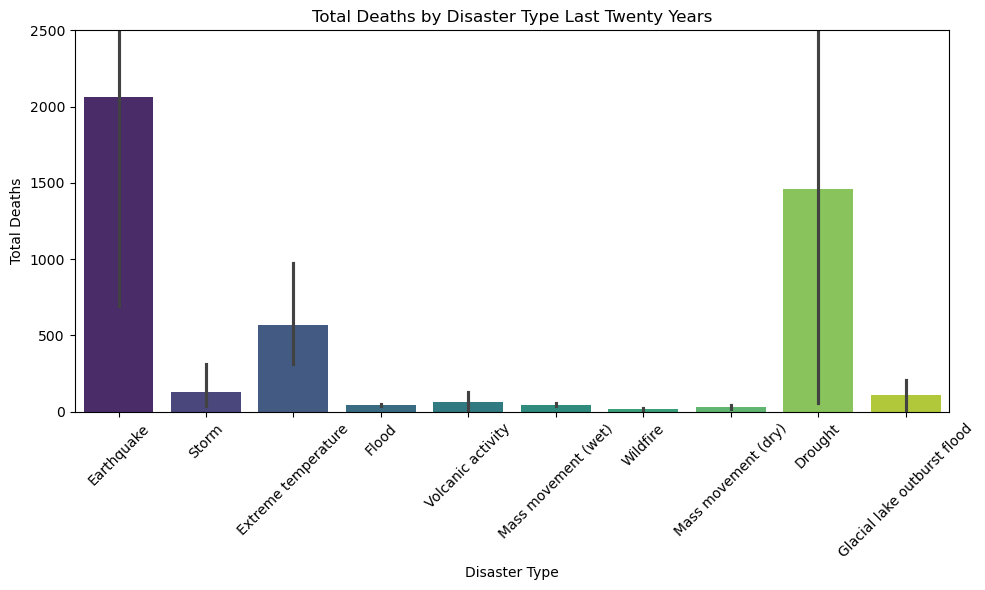

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=natural_disaster_df, x='Disaster Type', y='Total Deaths', palette='viridis')
plt.title('Total Deaths by Disaster Type Last Twenty Years')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.ylim(0, 2500)  
plt.tight_layout()
plt.show()

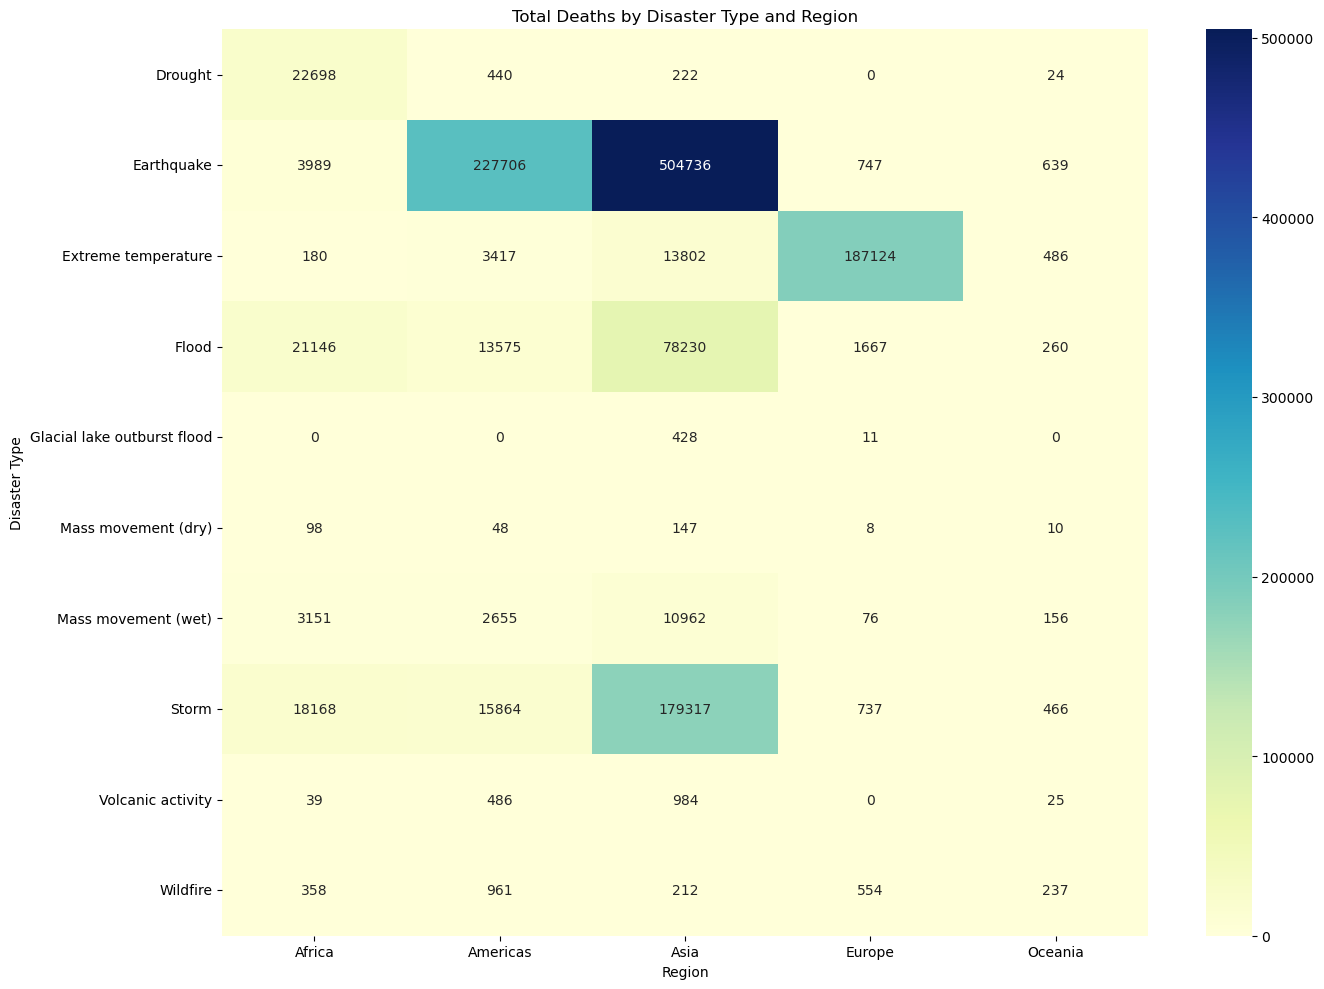

In [7]:
pivot_table = natural_disaster_df.pivot_table(index='Disaster Type', columns='Region', values='Total Deaths', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Total Deaths by Disaster Type and Region')
plt.xlabel('Region')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.show()

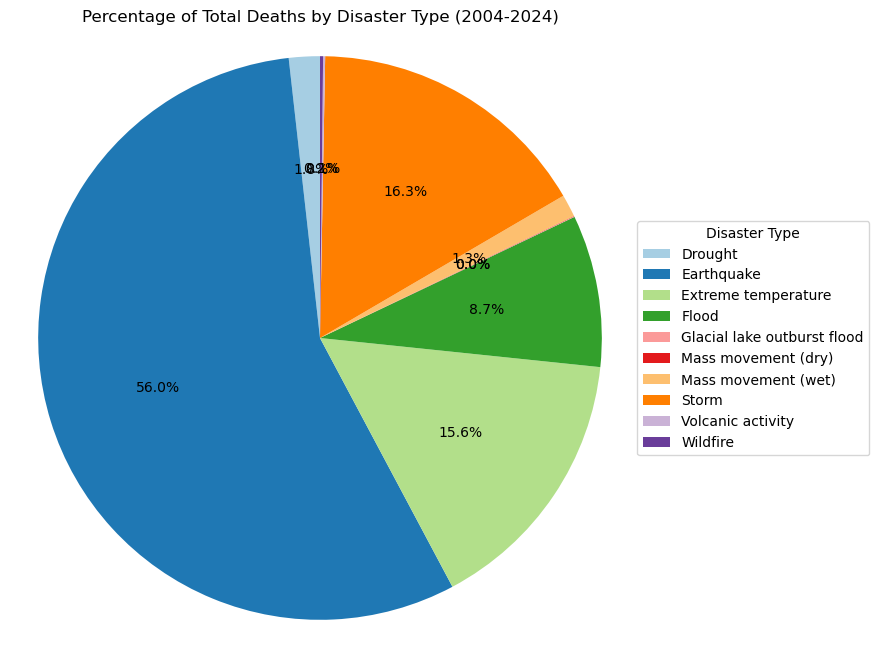

In [8]:
# Group the data by 'Disaster Type' and sum the 'Total Deaths'
disaster_deaths = natural_disaster_df.groupby('Disaster Type')['Total Deaths'].sum()

# Plot a pie chart using Matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size
wedges, texts, autotexts = plt.pie(disaster_deaths, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Percentage of Total Deaths by Disaster Type (2004-2024)')

# Ensure that the pie chart is a circle
plt.axis('equal')

# Add a legend with the disaster types
plt.legend(wedges, disaster_deaths.index, title="Disaster Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [3]:
#Info on columns
natural_disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     7692 non-null   object 
 1   Historic                                   7692 non-null   object 
 2   Classification Key                         7692 non-null   object 
 3   Disaster Group                             7692 non-null   object 
 4   Disaster Subgroup                          7692 non-null   object 
 5   Disaster Type                              7692 non-null   object 
 6   Disaster Subtype                           7692 non-null   object 
 7   External IDs                               2090 non-null   object 
 8   Event Name                                 1464 non-null   object 
 9   ISO                                        7692 non-null   object 
 10  Country                 

In [4]:
#Get unique values in the Disaster Type and Disaster Subtype columns
disaster_type = natural_disaster_df['Disaster Type'].unique()
disaster_subtype = natural_disaster_df['Disaster Subtype'].unique()

print(disaster_type)
print(disaster_subtype)

['Earthquake' 'Storm' 'Extreme temperature' 'Flood' 'Volcanic activity'
 'Mass movement (wet)' 'Wildfire' 'Mass movement (dry)' 'Drought'
 'Glacial lake outburst flood']
['Ground movement' 'Tropical cyclone' 'Storm (General)' 'Cold wave'
 'Flash flood' 'Riverine flood' 'Blizzard/Winter storm' 'Ash fall'
 'Landslide (wet)' 'Severe weather' 'Mudslide' 'Tornado' 'Forest fire'
 'Hail' 'Lightning/Thunderstorms' 'Heat wave' 'Avalanche (wet)'
 'Flood (General)' 'Landslide (dry)' 'Tsunami'
 'Land fire (Brush, Bush, Pasture)' 'Drought' 'Extra-tropical storm'
 'Severe winter conditions' 'Wildfire (General)' 'Coastal flood'
 'Rockfall (dry)' 'Sand/Dust storm' 'Rockfall (wet)' 'Avalanche (dry)'
 'Volcanic activity (General)' 'Lava flow' 'Storm surge' 'Derecho'
 'Pyroclastic flow' 'Glacial lake outburst flood' 'Lahar']


In [5]:
print(len(disaster_type))
print(len(disaster_subtype))

10
37


In [7]:
#Drop unwanted columns   
natural_disaster_df = natural_disaster_df.drop(columns=['Historic','Classification Key','Disaster Group','Disaster Subgroup',
                                                        'External IDs','Origin','Associated Types','Location','River Basin','Admin Units',
                                                        'Entry Date', 'Last Update'])
natural_disaster_df.head()

,DisNo.,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,Region,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,2004-0001-IDN,Earthquake,Ground movement,NaN,IDN,Indonesia,South-eastern Asia,Asia,No,No,No,NaN,5.8,Moment Magnitude,-8.31,115.788,2004,1.0,1.0,2004,1.0,1.0,1.0,40.0,30000.0,NaN,30040.0,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586
1,2004-0004-ASM,Storm,Tropical cyclone,Heta,ASM,American Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,NaN,60.0,20000.0,3000.0,23060.0,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586
2,2004-0004-NIU,Storm,Tropical cyclone,Heta,NIU,Niue,Polynesia,Oceania,No,No,No,NaN,300.0,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,1.0,2.0,200.0,500.0,702.0,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586
3,2004-0004-TON,Storm,Tropical cyclone,Heta,TON,Tonga,Polynesia,Oceania,No,No,No,NaN,NaN,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586
4,2004-0004-WSM,Storm,Tropical cyclone,Heta,WSM,Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586


In [8]:
disaster_type_ids = np.arange(1, 11)
disaster_subtype_ids = np.arange(1, 38)

print(disaster_type_ids)
print(disaster_subtype_ids)

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [9]:
#Each Disaster Type was given an 'id' 
type_ids = [f"type{type_ids}" for type_ids in disaster_type_ids]

#Each Disaster Subtype was given an 'id'     
sub_type_ids = [f"subtype{sub_type_ids}" for sub_type_ids in disaster_subtype_ids]
    
print(type_ids)
print(sub_type_ids)

['type1', 'type2', 'type3', 'type4', 'type5', 'type6', 'type7', 'type8', 'type9', 'type10']
['subtype1', 'subtype2', 'subtype3', 'subtype4', 'subtype5', 'subtype6', 'subtype7', 'subtype8', 'subtype9', 'subtype10', 'subtype11', 'subtype12', 'subtype13', 'subtype14', 'subtype15', 'subtype16', 'subtype17', 'subtype18', 'subtype19', 'subtype20', 'subtype21', 'subtype22', 'subtype23', 'subtype24', 'subtype25', 'subtype26', 'subtype27', 'subtype28', 'subtype29', 'subtype30', 'subtype31', 'subtype32', 'subtype33', 'subtype34', 'subtype35', 'subtype36', 'subtype37']


In [10]:
# Disaster Type with id in a Dataframe
disaster_type_df = pd.DataFrame({
    'Disaster Type id': type_ids,
    'Disaster Type': disaster_type
})

disaster_type_df

,Disaster Type id,Disaster Type
0,type1,Earthquake
1,type2,Storm
2,type3,Extreme temperature
3,type4,Flood
4,type5,Volcanic activity
5,type6,Mass movement (wet)
6,type7,Wildfire
7,type8,Mass movement (dry)
8,type9,Drought
9,type10,Glacial lake outburst flood


In [11]:
# Disaster Subtype with id in a Dataframe
disaster_subtype_df = pd.DataFrame({
    'Disaster Subtype id': sub_type_ids,
    'Disaster Subtype': disaster_subtype
})

disaster_subtype_df

,Disaster Subtype id,Disaster Subtype
0,subtype1,Ground movement
1,subtype2,Tropical cyclone
2,subtype3,Storm (General)
3,subtype4,Cold wave
4,subtype5,Flash flood
5,subtype6,Riverine flood
6,subtype7,Blizzard/Winter storm
7,subtype8,Ash fall
8,subtype9,Landslide (wet)
9,subtype10,Severe weather


In [12]:
# Export Dataframes as CSV files.
disaster_type_df.to_csv("Resources/category.csv", index=False)

disaster_subtype_df.to_csv("Resources/subcategory.csv", index=False)

In [13]:
# Copy of natural_disaster_df
new_natural_disaster_df = natural_disaster_df.copy()
new_natural_disaster_df.head(5)

,DisNo.,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,Region,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,2004-0001-IDN,Earthquake,Ground movement,NaN,IDN,Indonesia,South-eastern Asia,Asia,No,No,No,NaN,5.8,Moment Magnitude,-8.31,115.788,2004,1.0,1.0,2004,1.0,1.0,1.0,40.0,30000.0,NaN,30040.0,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586
1,2004-0004-ASM,Storm,Tropical cyclone,Heta,ASM,American Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,NaN,60.0,20000.0,3000.0,23060.0,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586
2,2004-0004-NIU,Storm,Tropical cyclone,Heta,NIU,Niue,Polynesia,Oceania,No,No,No,NaN,300.0,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,1.0,2.0,200.0,500.0,702.0,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586
3,2004-0004-TON,Storm,Tropical cyclone,Heta,TON,Tonga,Polynesia,Oceania,No,No,No,NaN,NaN,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586
4,2004-0004-WSM,Storm,Tropical cyclone,Heta,WSM,Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586


In [14]:
#Merge tables
first_natural_disaster_df = new_natural_disaster_df.merge(disaster_type_df, on = 'Disaster Type', how = 'left')
natural_disaster_merged_df = first_natural_disaster_df.merge(disaster_subtype_df, on = 'Disaster Subtype', how = 'left')

natural_disaster_merged_df.head(5)

,DisNo.,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,Region,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Disaster Type id,Disaster Subtype id
0,2004-0001-IDN,Earthquake,Ground movement,NaN,IDN,Indonesia,South-eastern Asia,Asia,No,No,No,NaN,5.8,Moment Magnitude,-8.31,115.788,2004,1.0,1.0,2004,1.0,1.0,1.0,40.0,30000.0,NaN,30040.0,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586,type1,subtype1
1,2004-0004-ASM,Storm,Tropical cyclone,Heta,ASM,American Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,NaN,60.0,20000.0,3000.0,23060.0,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586,type2,subtype2
2,2004-0004-NIU,Storm,Tropical cyclone,Heta,NIU,Niue,Polynesia,Oceania,No,No,No,NaN,300.0,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,1.0,2.0,200.0,500.0,702.0,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586,type2,subtype2
3,2004-0004-TON,Storm,Tropical cyclone,Heta,TON,Tonga,Polynesia,Oceania,No,No,No,NaN,NaN,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,type2,subtype2
4,2004-0004-WSM,Storm,Tropical cyclone,Heta,WSM,Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,type2,subtype2


In [15]:
natural_disaster_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     7692 non-null   object 
 1   Disaster Type                              7692 non-null   object 
 2   Disaster Subtype                           7692 non-null   object 
 3   Event Name                                 1464 non-null   object 
 4   ISO                                        7692 non-null   object 
 5   Country                                    7692 non-null   object 
 6   Subregion                                  7692 non-null   object 
 7   Region                                     7692 non-null   object 
 8   OFDA/BHA Response                          7692 non-null   object 
 9   Appeal                                     7692 non-null   object 
 10  Declaration             

In [43]:
#Creating total_affected_df DataFrame
total_affected_df = natural_disaster_merged_df.filter(['DisNo.','Total Deaths','No. Injured','No. Affected',
                                                       'No. Homeless', 'Total Affected'], axis=1)

total_affected_df.head(5)

,DisNo.,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
0,2004-0001-IDN,1.0,40.0,30000.0,NaN,30040.0
1,2004-0004-ASM,NaN,60.0,20000.0,3000.0,23060.0
2,2004-0004-NIU,1.0,2.0,200.0,500.0,702.0
3,2004-0004-TON,NaN,NaN,NaN,NaN,NaN
4,2004-0004-WSM,1.0,NaN,NaN,NaN,NaN


In [45]:
#Sorting DataFrame
sorted_total_affected_df = total_affected_df.sort_values(by='Total Affected', ascending= False)

sorted_total_affected_df.head(5)

,DisNo.,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected
4400,2015-9618-IND,NaN,NaN,330000000.0,NaN,330000000.0
2422,2010-0239-CHN,1691.0,NaN,134000000.0,NaN,134000000.0
1335,2007-0268-CHN,535.0,4000.0,105000000.0,NaN,105004000.0
4407,2016-0010-USA,50.0,12.0,85000000.0,NaN,85000012.0
1605,2008-0020-CHN,129.0,NaN,77000000.0,NaN,77000000.0


In [18]:
total_affected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DisNo.          7692 non-null   object 
 1   Total Deaths    5469 non-null   float64
 2   No. Injured     2202 non-null   float64
 3   No. Affected    5134 non-null   float64
 4   Total Affected  6143 non-null   float64
dtypes: float64(4), object(1)
memory usage: 300.6+ KB


In [19]:
#Creating total_damage_df DataFrame
total_damage_df = natural_disaster_merged_df.filter(["DisNo.", "OFDA/BHA Response", "Appeal", "Declaration", "AID Contribution ('000 US$)", 
                                                     "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", 
                                                    "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
                                                     "Total Damage ('000 US$)","Total Damage, Adjusted ('000 US$)",
                                                    "CPI"], axis=1)

total_damage_df.head(5)

,DisNo.,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
0,2004-0001-IDN,No,No,No,NaN,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586
1,2004-0004-ASM,No,No,Yes,NaN,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586
2,2004-0004-NIU,No,No,No,NaN,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586
3,2004-0004-TON,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586
4,2004-0004-WSM,No,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586


In [20]:
#Sorting DataFrame
sorted_total_damage_df = total_damage_df.sort_values(by= "Total Damage, Adjusted ('000 US$)", ascending= False)

sorted_total_damage_df.head(5)

,DisNo.,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
2722,2011-0082-JPN,Yes,No,No,735797.0,NaN,NaN,37500000.0,50797348.0,210000000.0,284465151.0,73.822751
582,2005-0467-USA,No,No,Yes,NaN,NaN,NaN,60000000.0,93614347.0,125000000.0,195029889.0,64.092740
1676,2008-0192-CHN,Yes,No,No,303663.0,10000000.0,14152261.0,300000.0,424568.0,85000000.0,120294216.0,70.660089
4921,2017-0362-USA,No,No,Yes,NaN,NaN,NaN,30000000.0,37292199.0,95000000.0,118091963.0,80.445779
6905,2022-0614-USA,No,No,Yes,NaN,NaN,NaN,60000000.0,62469844.0,100000000.0,104116407.0,96.046342


In [21]:
#Copy DataFrame
main_natural_disaster_df = natural_disaster_merged_df.copy()

main_natural_disaster_df.head(5)

,DisNo.,Disaster Type,Disaster Subtype,Event Name,ISO,Country,Subregion,Region,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Disaster Type id,Disaster Subtype id
0,2004-0001-IDN,Earthquake,Ground movement,NaN,IDN,Indonesia,South-eastern Asia,Asia,No,No,No,NaN,5.8,Moment Magnitude,-8.31,115.788,2004,1.0,1.0,2004,1.0,1.0,1.0,40.0,30000.0,NaN,30040.0,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586,type1,subtype1
1,2004-0004-ASM,Storm,Tropical cyclone,Heta,ASM,American Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,NaN,60.0,20000.0,3000.0,23060.0,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586,type2,subtype2
2,2004-0004-NIU,Storm,Tropical cyclone,Heta,NIU,Niue,Polynesia,Oceania,No,No,No,NaN,300.0,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,1.0,2.0,200.0,500.0,702.0,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586,type2,subtype2
3,2004-0004-TON,Storm,Tropical cyclone,Heta,TON,Tonga,Polynesia,Oceania,No,No,No,NaN,NaN,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,type2,subtype2
4,2004-0004-WSM,Storm,Tropical cyclone,Heta,WSM,Samoa,Polynesia,Oceania,No,No,Yes,NaN,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,type2,subtype2


In [49]:
#Drop columns
drop_columns_disaster_df = main_natural_disaster_df.drop(columns=["Disaster Type", "Disaster Subtype", "Total Deaths",
                                                                          "No. Injured","No. Affected","No. Homeless", "Total Affected", 
                                                                          "OFDA/BHA Response", "Appeal", "Declaration", "AID Contribution ('000 US$)",
                                                                          "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)",
                                                                          "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)",
                                                                          "Total Damage ('000 US$)","Total Damage, Adjusted ('000 US$)","CPI"
                                                                  ])

drop_columns_disaster_df.head(5)

,DisNo.,Event Name,ISO,Country,Subregion,Region,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Disaster Type id,Disaster Subtype id
0,2004-0001-IDN,NaN,IDN,Indonesia,South-eastern Asia,Asia,5.8,Moment Magnitude,-8.31,115.788,2004,1.0,1.0,2004,1.0,1.0,type1,subtype1
1,2004-0004-ASM,Heta,ASM,American Samoa,Polynesia,Oceania,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,type2,subtype2
2,2004-0004-NIU,Heta,NIU,Niue,Polynesia,Oceania,300.0,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,type2,subtype2
3,2004-0004-TON,Heta,TON,Tonga,Polynesia,Oceania,NaN,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,type2,subtype2
4,2004-0004-WSM,Heta,WSM,Samoa,Polynesia,Oceania,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,type2,subtype2


In [55]:
#Reorder final DataFrame
final_natural_disaster_df = drop_columns_disaster_df[["DisNo.", "Disaster Type id", "Disaster Subtype id", "Event Name", 
                                 "Region","Subregion", "Country", "ISO", "Magnitude", "Magnitude Scale",
                                 "Latitude", "Longitude", "Start Year", "Start Month", "Start Day", "End Year", 
                                 "End Month", "End Day"]]

final_natural_disaster_df.head(5)

,DisNo.,Disaster Type id,Disaster Subtype id,Event Name,Region,Subregion,Country,ISO,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day
0,2004-0001-IDN,type1,subtype1,NaN,Asia,South-eastern Asia,Indonesia,IDN,5.8,Moment Magnitude,-8.31,115.788,2004,1.0,1.0,2004,1.0,1.0
1,2004-0004-ASM,type2,subtype2,Heta,Oceania,Polynesia,American Samoa,ASM,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0
2,2004-0004-NIU,type2,subtype2,Heta,Oceania,Polynesia,Niue,NIU,300.0,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0
3,2004-0004-TON,type2,subtype2,Heta,Oceania,Polynesia,Tonga,TON,NaN,Kph,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0
4,2004-0004-WSM,type2,subtype2,Heta,Oceania,Polynesia,Samoa,WSM,310.0,Kph,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0


In [57]:
# Export Dataframes as CSV files.
total_affected_df.to_csv("Resources/lives affected.csv", index=False)

total_damage_df.to_csv("Resources/damage.csv", index=False)

final_natural_disaster_df.to_csv("Resources/natural disaster.csv", index=False)